<a href="https://colab.research.google.com/github/airelavmi/netology/blob/main/HW2_stat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Взяты данные о глобальном индексе доходов, покупательной способности и затратах
# источник: https://www.kaggle.com/datasets/meeratif/global-income-purchasing-power
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import json

# увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 11, 7

In [15]:
# Загрузка данных из CSV-файла
df = pd.read_csv('/content/worldwide.csv')

In [16]:
df.head()

,Rank,Country/Region,Cost index,Ø Monthly income,Purchasing power index
0,1,Bermuda *,157.9,"10,437 USD",103.8
1,2,Cayman Islands *,138.3,"5,433 USD",61.7
2,3,Switzerland,131.4,"7,454 USD",89.1
3,4,Turks and Caicos Islands *,124.6,"2,013 USD",25.4
4,5,Israel,123.1,"4,554 USD",58.1


**Rank:** This column represents the ranking of countries or regions based on a specific criterion, which is not explicitly mentioned in the column name. The rank could be related to the overall cost of living, quality of life, economic indicators, or any other relevant metric. Lower ranks typically indicate better performance or lower costs, depending on the context.

**Country/Region:** This column contains the names of the countries or regions being analyzed in the dataset. Each row corresponds to a specific country or region, and this column serves as the identifier for each data point.

**Cost Index:** The cost index column provides a numerical value that quantifies the cost of living in each country or region. A higher cost index value indicates that living expenses, such as housing, food, transportation, and other essentials, are relatively high in that particular location. Conversely, a lower cost index suggests a more affordable cost of living.

**Ø Monthly Income:** This column represents the average monthly income for residents of each country or region. It provides insight into the earning potential and income levels of the population in different areas. A higher monthly income typically suggests greater financial resources for residents.

**Purchasing Power Index:** The purchasing power index column measures the relative purchasing power of the population in each country or region. It indicates how far a given income will go in terms of buying goods and services in that location. A higher purchasing power index suggests that the population can afford a relatively higher standard of living, while a lower index implies reduced purchasing power.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    101 non-null    int64  
 1   Country/Region          101 non-null    object 
 2   Cost index              101 non-null    float64
 3   Ø Monthly income        101 non-null    object 
 4   Purchasing power index  101 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.1+ KB


In [18]:
# Приведем данные столбца Ø Monthly income к числовому формату
df['Ø Monthly income'] = df['Ø Monthly income'].str.replace('[^\d.]', '', regex=True).astype(float)

In [20]:
df.head(15)

,Rank,Country/Region,Cost index,Ø Monthly income,Purchasing power index
0,1,Bermuda *,157.9,10437.0,103.8
1,2,Cayman Islands *,138.3,5433.0,61.7
2,3,Switzerland,131.4,7454.0,89.1
3,4,Turks and Caicos Islands *,124.6,2013.0,25.4
4,5,Israel,123.1,4554.0,58.1
5,6,Barbados,121.8,1613.0,20.8
6,7,Iceland,120.1,5685.0,74.3
7,8,Ireland,110.6,6756.0,96.0
8,9,Denmark,109.2,6100.0,87.8
9,10,Norway,108.1,7959.0,115.7


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    101 non-null    int64  
 1   Country/Region          101 non-null    object 
 2   Cost index              101 non-null    float64
 3   Ø Monthly income        101 non-null    float64
 4   Purchasing power index  101 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 4.1+ KB


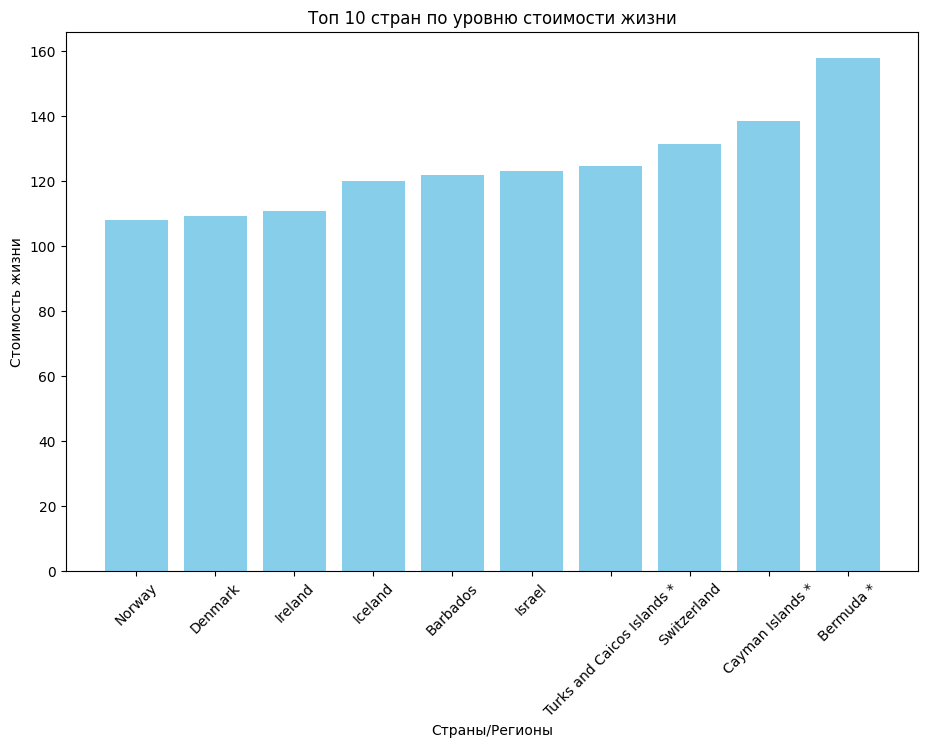

In [49]:
top_10_expensive = df.nlargest(10, 'Cost index').sort_values(by='Cost index', ascending=True)
plt.bar(top_10_expensive['Country/Region'], top_10_expensive['Cost index'], color='skyblue', ) # Создание столбчатой диаграммы
plt.xlabel('Страны/Регионы')
plt.ylabel('Стоимость жизни')
plt.title('Топ 10 стран по уровню стоимости жизни')
plt.xticks(rotation=45);

Можно увидеть, что самым дорогим для проживания регионом являются Бермуды

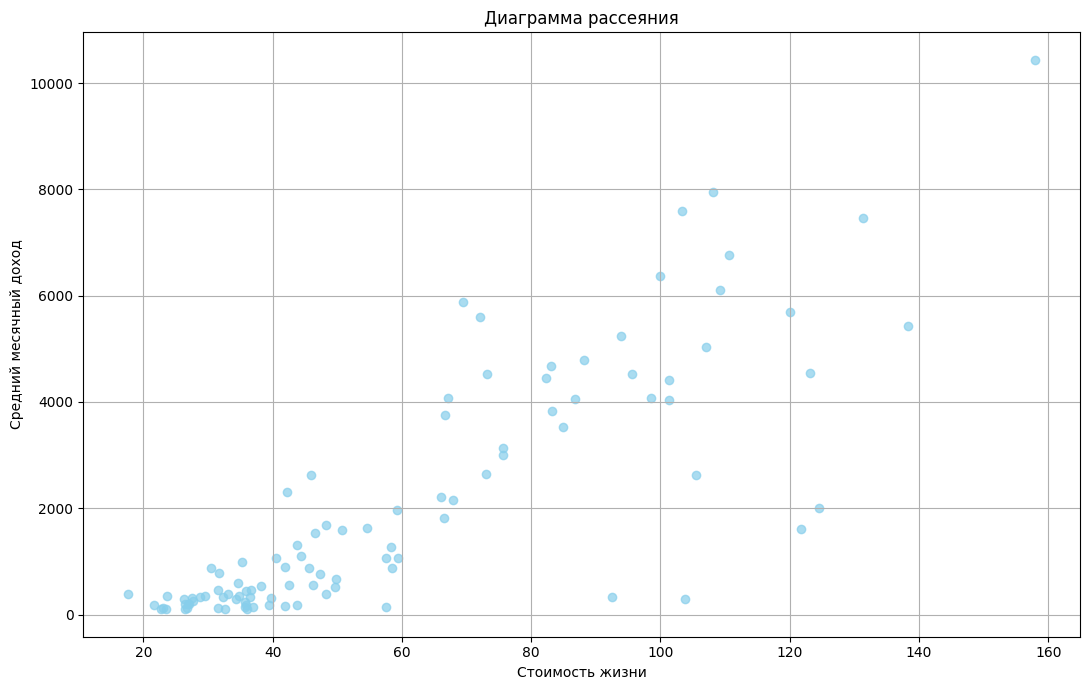

In [46]:
plt.scatter(df['Cost index'], df['Ø Monthly income'], color='skyblue', alpha=0.7)  # Создание диаграммы рассеяния
plt.xlabel('Стоимость жизни')
plt.ylabel('Средний месячный доход')
plt.title('Диаграмма рассеяния')

plt.grid(True)

plt.tight_layout()
plt.show()

Можно выявить, есть ли корреляция между уровнем стоимости жизни и средним доходом.Например, страны с более высоким индексом стоимости могут иметь более высокие доходы.

<Axes: xlabel='Cost index', ylabel='Ø Monthly income'>

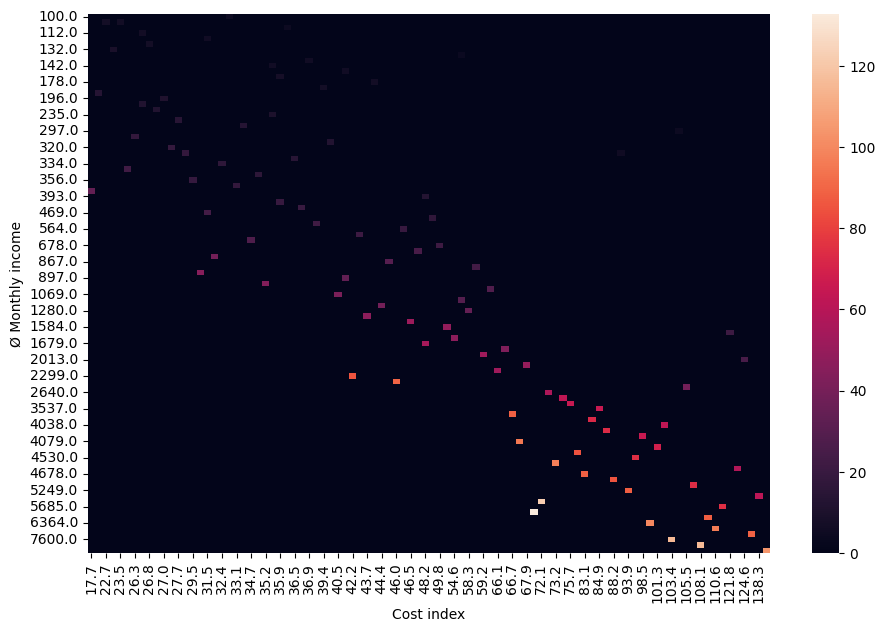

In [48]:
platform_genre_sales = df.pivot_table(
                        index='Ø Monthly income',
                        columns='Cost index',
                        values='Purchasing power index',
                        aggfunc=sum).fillna(0)

platform_genre_sales
sns.heatmap(platform_genre_sales)

Можно выяснить, какие факторы сильно коррелируют друг с другом.

Например, возможно, высокий доход коррелирует с высокой покупательной способностью.

<Axes: title={'center': 'Распределение месячного дохода'}>

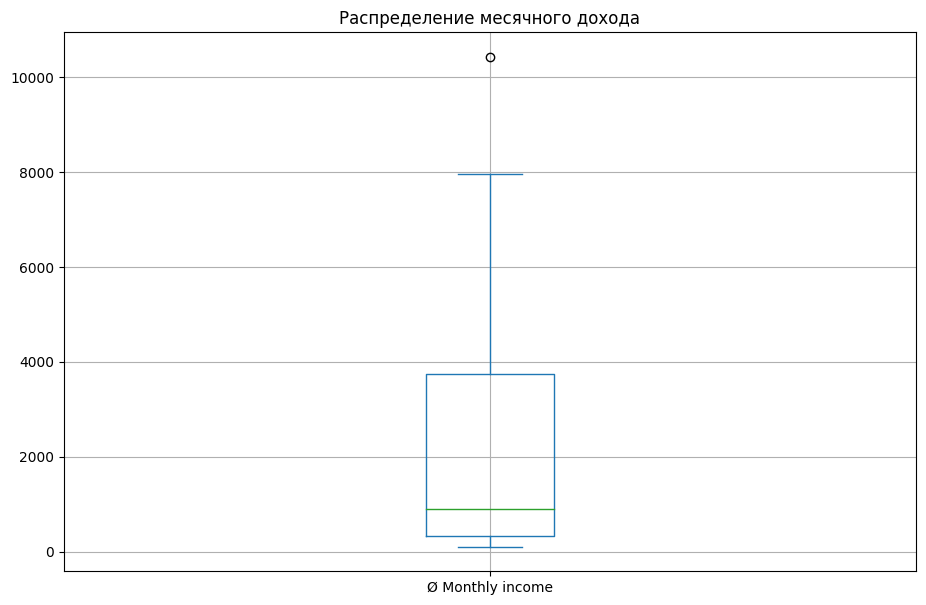

In [47]:
df['Ø Monthly income'].plot(kind='box',
                   title='Распределение месячного дохода', grid=True)

Можно предположить, что в большинстве стран/регионов среднемесячный доход не превышает 2000 USD.

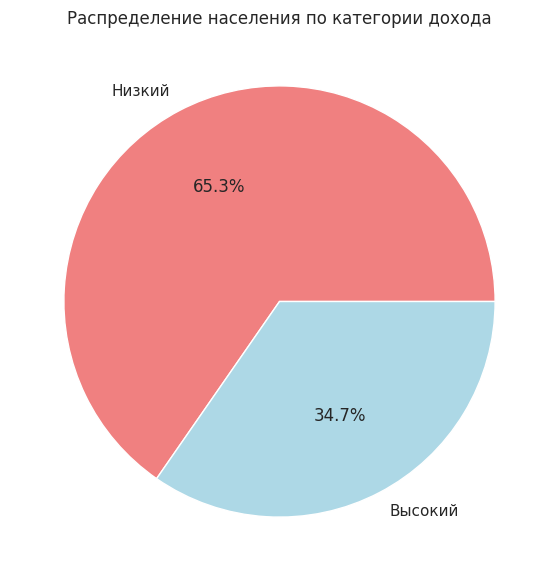

In [57]:
# средний доход
average_income = df['Ø Monthly income'].mean()
df['Income Category'] = df['Ø Monthly income'].apply(lambda x: 'Высокий' if x > average_income else 'Низкий')

income_counts = df['Income Category'].value_counts()

plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Распределение населения по категории дохода')

plt.show()

Можно увидеть, что большая часть населения живет в странах с низкими доходами

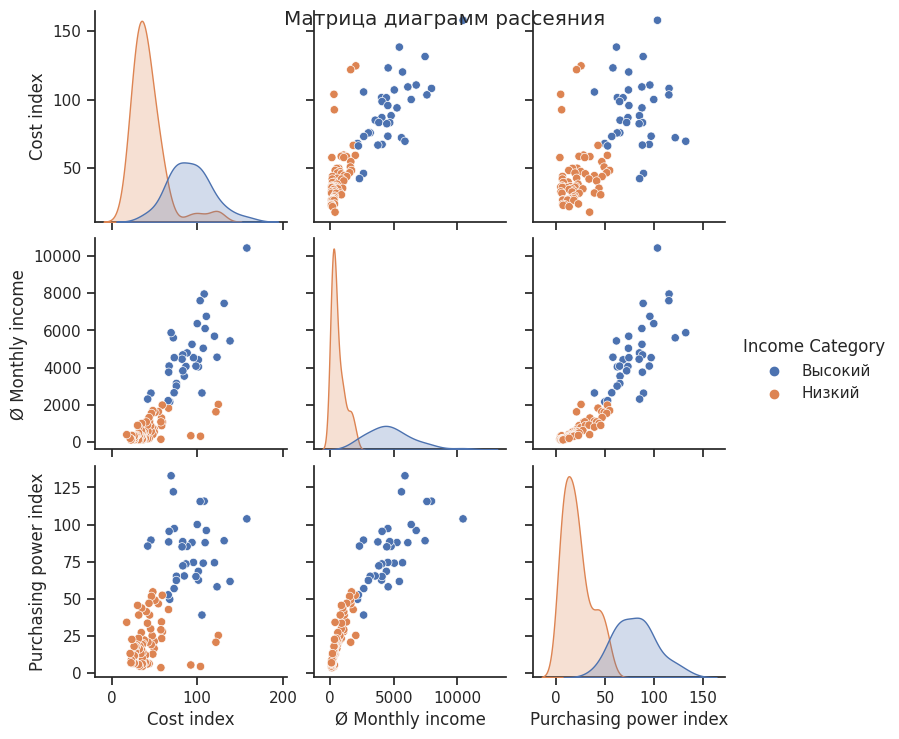

In [62]:
average_income = df['Ø Monthly income'].mean()
df['Income Category'] = df['Ø Monthly income'].apply(lambda x: 'Высокий' if x > average_income else 'Низкий')


sns.set(style="ticks")
sns.pairplot(df[['Cost index', 'Ø Monthly income', 'Purchasing power index', 'Income Category']], markers="o", diag_kind="kde", hue = 'Income Category')
plt.suptitle("Матрица диаграмм рассеяния")
plt.show()

Можно обнаружить, что существуют группы стран с похожими характеристиками по стоимости жизни, доходу и покупательной способности